# Stock Market Analysis and Prediction Project

In this project, students will apply the concepts learned in the course modules to analyze and model stock market data. This notebook must be submitted on HuskyCT, and the answers to the questions will also be submitted on HuskyCT.


# Libraries

All imports should be placed in the code block below. I am providing the ones you are most likely going to need. Of course, you can incorporate other libraries and functionalities if you need.

You can install packages if you want, but again, I must be able to run the notebook with a single "run all" execution.

In [872]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data retrieval

Use Yahoo! Finances to extract **daily data** for your stock ranging **from Jan 1st, 2023, until December 31st, 2023**.

In [873]:
market_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

market_data = market_data.reset_index()

market_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
market_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
1,2023-01-04,124.907715,127.181283,123.642427,125.431622,89113600
2,2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700
3,2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
4,2023-01-09,128.654160,131.876702,128.397153,128.970489,70790800


### Rename the columns

Get rid of the MultiIndex structure. After this operation, the dataframe must consists of the columns `Close`,`High`,`Low`,`Open`, and `Volume`. Present the dataframe to show the result of your work.

In [874]:
market_data = market_data[['Close', 'High', 'Low', 'Open', 'Volume']]
market_data.head()

,Close,High,Low,Open,Volume
0,128.782641,129.395510,122.742865,123.632523,112117500
1,125.431622,127.181283,123.642427,124.907715,89113600
2,125.668849,126.301493,123.326093,123.583099,80962700
3,124.561732,128.792531,123.454601,128.130234,87754700
4,128.970489,131.876702,128.397153,128.654160,70790800


# 1 - Data Preparation



### Plot the volume of transactions over time.



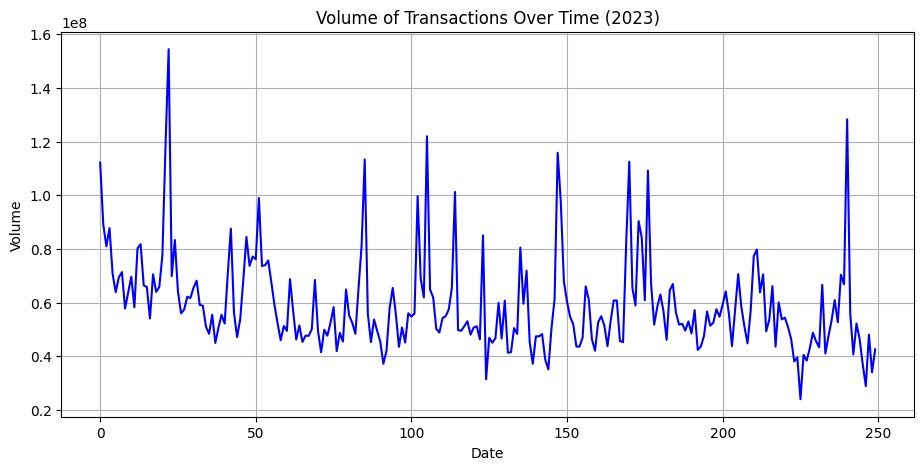

In [875]:
plt.figure(figsize=(11, 5))
plt.plot(market_data.index, market_data['Volume'], color='Blue')
plt.title('Volume of Transactions Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

### Removing outliers

You should replace `Close` prices in the rows where the respective entries in `Volume` are larger than the quantile 0.9 of the values in the column `Volume` with NaNs. You should print the mean value of `Close` before and after the deletion process and also the number of null values
to show the results of your work.


In [876]:
Volume_1 = market_data['Volume'].quantile(0.9)
market_data.loc[market_data['Volume'] > Volume_1, 'Close'] = np.nan
print(f"Mean Close before: {market_data['Close'].mean():.3f}")
print(f"Mean Close after: {market_data['Close'].mean():.3f}")
print(f"Null values: {market_data['Close'].isnull().sum()}")


Mean Close before: 171.777
Mean Close after: 171.777
Null values: 25


### Data Imputation

Use **linear interpolation** to fill the NaNs created in the previous step. You should print the number of null values and the mean value of `Close` after the imputation to show the results of your work.

In [877]:
market_data['Close'] = market_data['Close'].interpolate('linear')
print(f"Null values: {market_data['Close'].isnull().sum()}")
print(f"Mean Close after: {market_data['Close'].mean():.3f}")

Null values: 4
Mean Close after: 171.546


### Visualize imputation

Plot the `Close` prices after imputation. The original points should appear in blue, whereas the imputed points should appear in red (as we did in class).

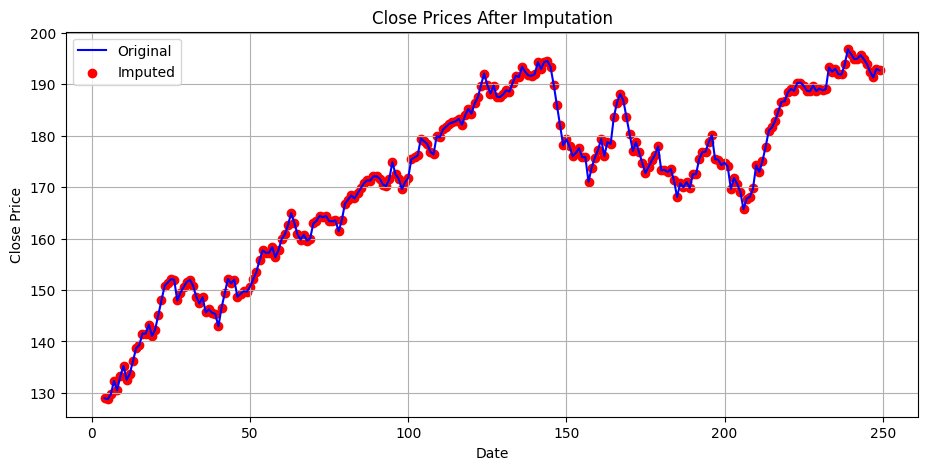

In [878]:
plt.figure(figsize=(11, 5))

plt.plot(market_data.index, market_data['Close'], color='Blue', label='Original')
plt.scatter(market_data.index, market_data['Close'], color='Red', label='Imputed')

plt.title('Close Prices After Imputation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### Feature engineering - Moving averages

Create 8-day, 25-day, and 30-day moving averages of `Close` prices. For reference, remember that the 3-day moving average for the sequence of values $(X_1, X_2, X_3, X_4)$ is the sequence $\left(\frac{X_1+X_2+X_3}{3}, \frac{X_2+X_3+X_4}{3}\right)$.

For stock prices, the $k$-day moving average that we use on day x is the average of the stock prices on days $i = x-1$, $i = x-2, ...,$i = x-k$ (i.e., **the moving average associated with a day should not consider the stock price of that same day**). Therefore, depending on how you compute the moving averages, you may need to shift the entries of the columns.

Present the first 10 rows of the dataframe to show the results of your work.

In [879]:
market_data['MA8'] = market_data['Close'].rolling(window=8).mean()
market_data['MA25'] = market_data['Close'].rolling(window=25).mean()
market_data['MA30'] = market_data['Close'].rolling(window=30).mean()
market_data.head(10)

,Close,High,Low,Open,Volume,MA8,MA25,MA30
0,NaN,129.395510,122.742865,123.632523,112117500,NaN,NaN,NaN
1,NaN,127.181283,123.642427,124.907715,89113600,NaN,NaN,NaN
2,NaN,126.301493,123.326093,123.583099,80962700,NaN,NaN,NaN
3,NaN,128.792531,123.454601,128.130234,87754700,NaN,NaN,NaN
4,128.970489,131.876702,128.397153,128.654160,70790800,NaN,NaN,NaN
5,128.762894,129.751401,126.647490,129.227493,63896200,NaN,NaN,NaN
6,129.741489,131.975509,128.960576,131.955750,69458900,NaN,NaN,NaN
7,132.341293,132.716915,129.929334,131.876694,71379600,NaN,NaN,NaN
8,130.512532,133.369316,130.146790,133.211151,57809700,NaN,NaN,NaN
9,133.280351,135.712069,132.588399,134.377594,63646600,NaN,NaN,NaN


### Feature engineering - Daily percentual changes

Compute the daily percentual price changes using `Close` prices, i.e., the value for row i should be the ratio between the `Close` price on that day and the `Close` price of the previous trading day. You should name this column `Price_Change` (-1 pt). Present the dataframe to show the result of your work.

In [880]:
market_data['Price_Change'] = market_data['Close'].pct_change()
market_data.head()

,Close,High,Low,Open,Volume,MA8,MA25,MA30,Price_Change
0,NaN,129.395510,122.742865,123.632523,112117500,NaN,NaN,NaN,NaN
1,NaN,127.181283,123.642427,124.907715,89113600,NaN,NaN,NaN,NaN
2,NaN,126.301493,123.326093,123.583099,80962700,NaN,NaN,NaN,NaN
3,NaN,128.792531,123.454601,128.130234,87754700,NaN,NaN,NaN,NaN
4,128.970489,131.876702,128.397153,128.654160,70790800,NaN,NaN,NaN,NaN


### Feature engineering - Intra-day volatility

Compute the intra-day stock volatility, which we will assume to be the difference between `High` and `Low` divided by `Close`. You should name this column `Volatility`. Present the dataframe to show the result of your work.

In [881]:
market_data['Volatility'] = (market_data['High'] - market_data['Low']) / market_data['Close']
market_data.head()

,Close,High,Low,Open,Volume,MA8,MA25,MA30,Price_Change,Volatility
0,NaN,129.395510,122.742865,123.632523,112117500,NaN,NaN,NaN,NaN,NaN
1,NaN,127.181283,123.642427,124.907715,89113600,NaN,NaN,NaN,NaN,NaN
2,NaN,126.301493,123.326093,123.583099,80962700,NaN,NaN,NaN,NaN,NaN
3,NaN,128.792531,123.454601,128.130234,87754700,NaN,NaN,NaN,NaN,NaN
4,128.970489,131.876702,128.397153,128.654160,70790800,NaN,NaN,NaN,NaN,0.026979


### Feature Engineering - Up

Create a binary column called `Up` that should contain the value one if the closing price is larger than the opening price and zero otherwise. Present the dataframe to show the result of your work, and print the number of rows where `Up` equals one.

In [882]:
market_data['Up'] = (market_data['Close'] > market_data['Open']).astype(int)
print(f"Number of rows where Up equals one: {market_data['Up'].sum()}")
market_data.head()

Number of rows where Up equals one: 97


,Close,High,Low,Open,Volume,MA8,MA25,MA30,Price_Change,Volatility,Up
0,NaN,129.395510,122.742865,123.632523,112117500,NaN,NaN,NaN,NaN,NaN,0
1,NaN,127.181283,123.642427,124.907715,89113600,NaN,NaN,NaN,NaN,NaN,0
2,NaN,126.301493,123.326093,123.583099,80962700,NaN,NaN,NaN,NaN,NaN,0
3,NaN,128.792531,123.454601,128.130234,87754700,NaN,NaN,NaN,NaN,NaN,0
4,128.970489,131.876702,128.397153,128.654160,70790800,NaN,NaN,NaN,NaN,0.026979,1


### Cleaning up - Remove NaNs

Remove all rows that contain at least one NaN. You should print the number of null values before and after this operation to show your work.


In [883]:
print(f"Null values before: {market_data.isnull().sum().sum()}")
market_data = market_data.dropna()
print(f"Null values after: {market_data.isnull().sum().sum()}")

Null values before: 85
Null values after: 0


### VIF inspection

Compute and show the VIF for all columns.

In [884]:
vif_data = pd.DataFrame()
vif_data["feature"] = market_data.columns
vif_data["VIF"] = [variance_inflation_factor(market_data.values, i) for i in range(market_data.shape[1])]
print(vif_data)


         feature            VIF
0          Close   57067.525494
1           High  811110.094553
2            Low  820256.660671
3           Open   64742.260719
4         Volume      19.161635
5            MA8   10365.211128
6           MA25   43619.634822
7           MA30   32517.701103
8   Price_Change       1.676703
9     Volatility     205.776043
10            Up       4.693230


# 2. Linear Regression for Stock Price Prediction

Use linear regression to predict stock closing prices based on features such as moving averages and volume. For this part, you should:
- Split your data for training and testing. You should use 20% for testing. You should use a randomized procedure; please set the random seed to `42` for reproducibility.
- You should use `MA8` and `MA25` as features and `Close` as target.


### 2.1 - Performance indicators

After training and testing your model, you should report its MSE and $R^2$ scores.


In [885]:
X = market_data[['MA8', 'MA25']]
y = market_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R²-score: {r2_score(y_test, y_pred):.3f}")

R²-score: 0.929


### 2.2 Scatter Plot

Present a scatter plot comparing the actual close prices (x-axis) and the predicted close prices (y-axis).

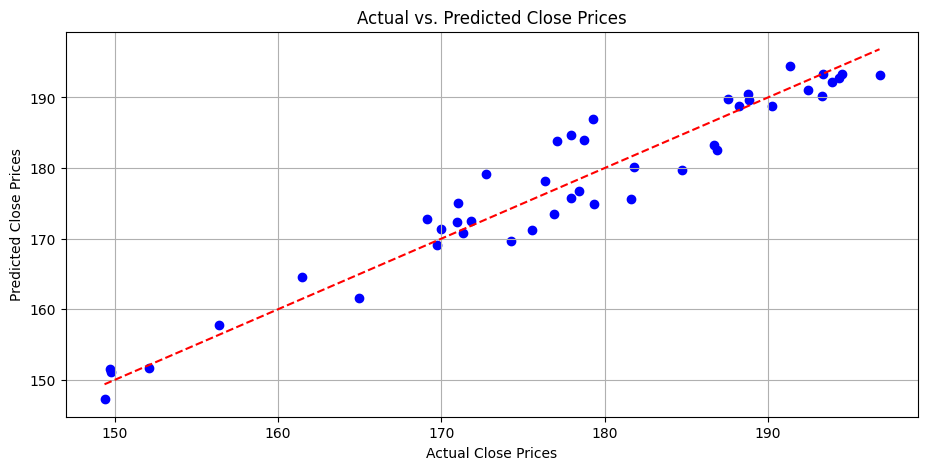

In [886]:
plt.figure(figsize=(11, 5))
plt.scatter(y_test, y_pred, color='Blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='Red', linestyle='--')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.grid(True)
plt.show()

# 3. Logistic Regression for Stock Trend Prediction

Next, you will create a classifier for a simpler question: will the stock's closing price be higher or lower than the opening price? The setup is similar, only the target variable changes:

- Split your data for training and testing. You should use 20% for testing. You should use a randomized procedure; please set the random seed to `42` for reproducibility.
- You should use `MA8` and `MA25` as features and `Up` as target.


### 3.1 - Performance Indicators

After training and testing your model, you should print the classification report.


In [887]:
X = market_data[['MA8', 'MA25']]
y = market_data['Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        24
           1       1.00      0.10      0.18        20

    accuracy                           0.59        44
   macro avg       0.79      0.55      0.45        44
weighted avg       0.77      0.59      0.48        44

Accuracy: 0.59


### 3.2 - Visualization of the results

You should present a visualization to show the results using the test data. You can use any of the plots we saw in class or something else if you prefer.


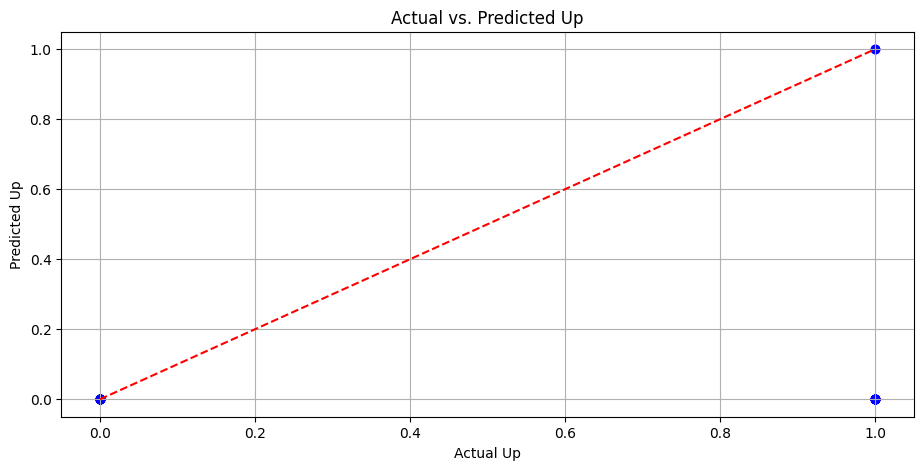

In [888]:
plt.figure(figsize=(11, 5))
plt.scatter(y_test, y_pred, color='Blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='Red', linestyle='--')
plt.title('Actual vs. Predicted Up')
plt.xlabel('Actual Up')
plt.ylabel('Predicted Up')
plt.grid(True)
plt.show()

# 4. Regularized Regression for Enhanced Prediction

Let's add more features to our model and use Ridge and Lasso regression to improve **stock price prediction**.


### 4.1 - Ridge Regression



####  Analyse alpha

You should identify a good interval of values for $\alpha$. More precisely:
- You should identify an **interval that contains a (local) optimum value of $\alpha$**.
- You should 5-fold cross-validation with $R^2$ as scoring metric to evaluate the model for each $\alpha$.
- You should use `np.linspace()` to generate the list of values.
- You may need to set the parameter `max_iter` if you see that the model is not converging. You must find a **reasonable** value for `max_iter`, i.e., it must be large enough to converge but it shouldn't be super large (otherwise, the model will take too long); setting `max_iter=5000` should be enough in most cases.

You should present a plot that shows the average R$^2$ scores for each value of $\alpha$ you are testing. Your plot should contain ate least 100 points. You should indicate the best point in the plot. Finally, you should print the best $\alpha$ value and its respective average $R^2$ score.



In [893]:
alphas_ridge1 = np.linspace(0.1, 100, 100)
ridge_scores = []
for alpha in alphas_ridge1:
    ridge = Ridge(alpha=alpha, max_iter=5000)
    score = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2').mean()
    ridge_scores.append(score)
best_ridge_alpha = alphas_ridge1[np.argmax(ridge_scores)]
print(f"Best R²: {max(ridge_scores):.3f}")

Best R²: -0.013


#### Train the model

Train and evaluate the performance of the model trained with the value of $\alpha$ identified in the previous steps. You should print the MSE score, the R2 score, and a plot showing the coefficients of the regressor to show your work.


In [895]:
alphas_lasso1 = np.linspace(0.001, 10, 100)
lasso_scores = []
for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    score = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2').mean()
    lasso_scores.append(score)
best_lasso_alpha = alphas_lasso[np.argmax(lasso_scores)]
print(f"Best R² for Lasso: {max(lasso_scores):.3f}")

Best R² for Lasso: -0.013


### 4.2 - Lasso Regression

The steps and instructions for the following questions are identical to the ones for the corresponding Ridge Regression questions.

#### Analyse alpha

You should identify a good interval of values for $\alpha$. More precisely:
- You should identify an **interval that contains a local optimum solution**.
- The scoring metric should be the $R^2$ score.
- You should use `np.linspace()` to generate the list of values.

You should present a plot that shows the average R$^2$ score for the range of values of $\alpha$ you are testing. You should also print the value of the best $\alpha$ and the associated average $R^2$ score.



In [898]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train, y_train)
print("Lasso Coefficients (Q16):")
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_}))

Lasso Coefficients (Q16):
  Feature  Coefficient
0     MA8     0.015890
1    MA25    -0.013809


#### Choose and train the model

Train and evaluate the performance of the best model (i.e., the model parameterized with the best value of $\alpha$ identified in the previous step) by generating a classification report.

# General Instructions

- When asked to **Present the data frame to show the results of your work**,  please use the command `.head()`, without `print()`.

- All plots must be adequate and complete. Namely, they should have adequate labels, the size must be adequate (neither too large nor too small), the title must make sense, it must have legends if applicable, etc.

# Rubric


- **Show the result of your work for each exercise.** Each exercise indicates what you should present after performing the required task. You will lose half of the points in the question where this is not done.

- **You must submit an executed notebook.** If something goes wrong and your notebook doesn't work, I cannot evaluate your work properly, and the submission will receive a grade deduction.

- **The notebook must run without error messages.** I will hit `Restart session and run all` to check your notebook. If this execution fails (e.g., something is missing or your code is wrong), you will receive a grade deduction. Warning messages are OK.

- **All libraries and methods must be imported in the first code block.**.

- **Be careful with academic misconduct.** I do not have mechanisms to stop you from using ChatGPT, talking to your colleagues, etc. However, I will react to evidence of academic misconduct. In particular:
- You must stick to the task at hand: if you are doing something that is not related to what is being asked, your grade will be deducted.
- I have to understand your code. If parts of your code are too convoluted or far more sophisticated than what we have used in class (especially in comparison to the rest of your notebook), your grade will be deducted as well.






